In [254]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns

In [255]:
# Set Variables

start = datetime(2017, 1, 1)

# End

end = datetime.now().date().isoformat()   # today

symbol = 'ETH-USD'

In [256]:
# Download the price data into Pandas DF

df = yf.download(symbol, start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [257]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984


In [258]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-06-03,1834.135010,1840.058838,1746.509766,1775.078613,1775.078613,14878001811
2022-06-04,1775.220825,1810.299683,1751.533325,1801.609497,1801.609497,8677951273
2022-06-05,1801.818970,1825.859619,1777.133301,1805.204956,1805.204956,8850385937
2022-06-06,1805.635986,1915.030518,1804.990234,1859.289673,1859.289673,16518471852
2022-06-07,1859.333740,1862.914917,1729.413574,1814.048340,1814.048340,24020076750


<AxesSubplot:xlabel='Date'>

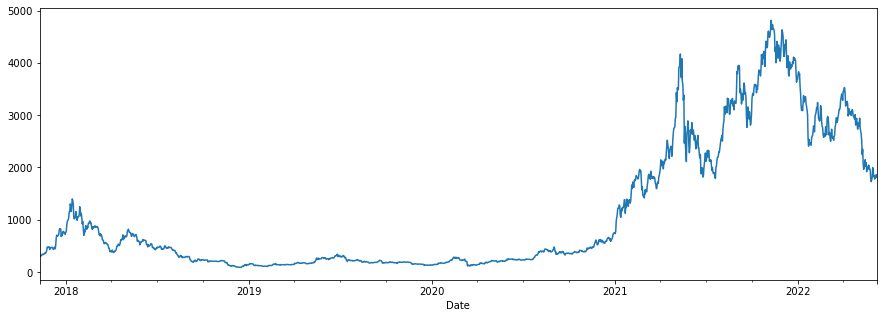

In [259]:
# print 'Adj Close' only

df['Adj Close'].plot(figsize=(15,5))

In [260]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
...,...,...,...,...,...,...
2022-06-03,1834.135010,1840.058838,1746.509766,1775.078613,1775.078613,14878001811
2022-06-04,1775.220825,1810.299683,1751.533325,1801.609497,1801.609497,8677951273
2022-06-05,1801.818970,1825.859619,1777.133301,1805.204956,1805.204956,8850385937


In [261]:
# Remove Volume Column

#new_df = df.drop(df.columns[5],axis=1)

In [262]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984


<AxesSubplot:xlabel='Date'>

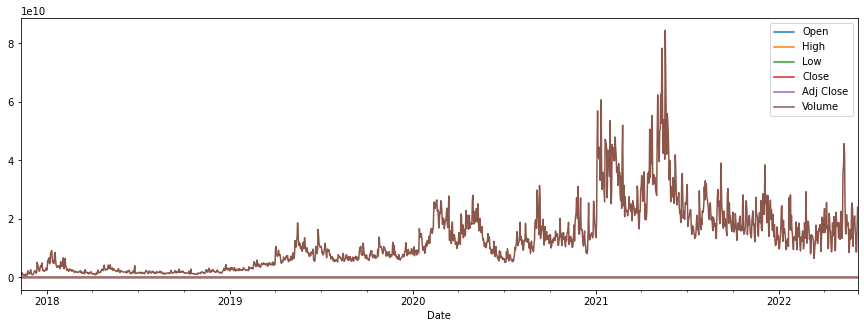

In [263]:
# Plot all price columns
df.plot(figsize=(15,5))

In [264]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
...,...,...,...,...,...,...
2022-06-03,1834.135010,1840.058838,1746.509766,1775.078613,1775.078613,14878001811
2022-06-04,1775.220825,1810.299683,1751.533325,1801.609497,1801.609497,8677951273
2022-06-05,1801.818970,1825.859619,1777.133301,1805.204956,1805.204956,8850385937


In [265]:
# PREDCITING 'n' DAYS OUT INTO THE FUTURE

projection = 30

# Create a new column called 'Prediction'

df['Prediction'] = df[['Close']].shift(-projection)

# Show the data

df.tail(35)

,Open,High,Low,Close,Adj Close,Volume,Prediction
Date,,,,,,,
2022-05-04,2783.131104,2956.686768,2779.273682,2940.644775,2940.644775,18186749944,1775.078613
2022-05-05,2940.226562,2948.960693,2704.916260,2749.213135,2749.213135,22642925048,1801.609497
2022-05-06,2748.931641,2754.837646,2645.335205,2694.979736,2694.979736,21027599270,1805.204956
2022-05-07,2694.991943,2696.652832,2599.523438,2636.093018,2636.093018,13369276367,1859.289673
2022-05-08,2636.121826,2638.830566,2498.430176,2517.459961,2517.459961,20802269935,1814.048340
2022-05-09,2518.508301,2528.258057,2238.062744,2245.430420,2245.430420,36333567678,NaN
2022-05-10,2242.650391,2450.760254,2206.756836,2343.510986,2343.510986,38202099639,NaN
2022-05-11,2342.754150,2441.079346,2018.855591,2072.108643,2072.108643,45743399154,NaN
2022-05-12,2072.504639,2170.458008,1748.303101,1961.701538,1961.701538,42463486402,NaN


In [266]:
# Create the independent data set (X)

X = np.array(df[['Close']])

# Remove the last 14 rows

X = X[:-projection]
print(X)

[[ 320.88400269]
 [ 299.25299072]
 [ 314.68099976]
 ...
 [2694.97973633]
 [2636.09301758]
 [2517.45996094]]


In [267]:
# Create the dependent data set (y)

y = df['Prediction'].values
y = y[:-projection]
print(y)

[ 473.50201416  441.7210083   515.13598633 ... 1805.20495605 1859.28967285
 1814.04833984]


In [268]:
# Split the data into 85% training and 15% testing data sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.15)


In [269]:
# Create and train the model

linReg = LinearRegression()

# Train the model

linReg.fit(X_train, y_train)

LinearRegression()

In [270]:
# Test the model using score

linReg_confidence = linReg.score(X_test, y_test)
print('Linear regression Confidence: ', linReg_confidence)

Linear regression Confidence:  0.8848061456484291


In [271]:
# Create a variable called x_projection and set it equal to the last 10 rows of data from the original dataset

x_projection = np.array(df[['Close']])[-projection:]
print(x_projection)

[[2245.43041992]
 [2343.51098633]
 [2072.10864258]
 [1961.70153809]
 [2014.41821289]
 [2056.27392578]
 [2145.70678711]
 [2022.72595215]
 [2090.40917969]
 [1916.65612793]
 [2018.33618164]
 [1961.31567383]
 [1974.51831055]
 [2043.17016602]
 [1972.18188477]
 [1978.98278809]
 [1944.82788086]
 [1803.91333008]
 [1724.92285156]
 [1757.94177246]
 [1812.03100586]
 [1996.44128418]
 [1942.32800293]
 [1823.56933594]
 [1834.1505127 ]
 [1775.07861328]
 [1801.60949707]
 [1805.20495605]
 [1859.28967285]
 [1814.04833984]]


In [272]:
# Print the linear regression models predictions for the next 14 days (But i can put less)

linReg_prediction = linReg.predict(x_projection)
print(linReg_prediction)

[2198.08109275 2290.12975165 2035.41852109 1931.80140026 1981.276025
 2020.55763174 2104.49041524 1989.0728423  2052.593584   1889.52626109
 1984.95304056 1931.43926647 1943.8299474  2008.25974688 1941.63721067
 1948.01986172 1915.96546481 1783.71709091 1709.58448872 1740.57276191
 1791.33553355 1964.40466873 1913.61932817 1802.1642619  1812.09470139
 1756.65569529 1781.55494252 1784.92928252 1835.68781532 1793.22880247]


In [273]:
df['Prediction']

Date
2017-11-09    473.502014
2017-11-10    441.721008
2017-11-11    515.135986
2017-11-12    651.431030
2017-11-13    702.767029
                 ...    
2022-06-03           NaN
2022-06-04           NaN
2022-06-05           NaN
2022-06-06           NaN
2022-06-07           NaN
Name: Prediction, Length: 1672, dtype: float64

<AxesSubplot:xlabel='Date'>

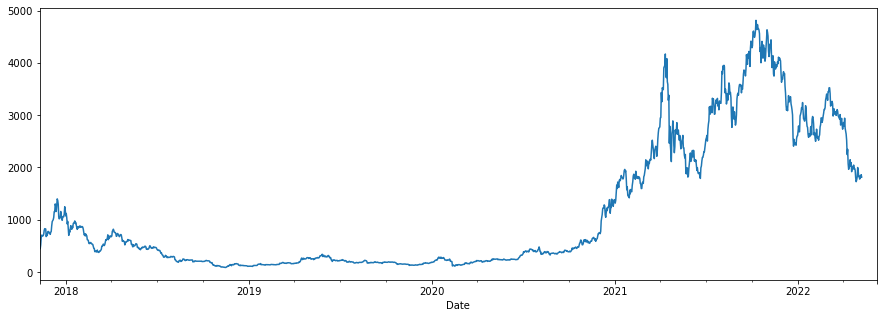

In [274]:
df['Prediction'].plot(figsize=(15,5))

In [275]:
from datetime import timedelta

test = df.index.copy()

new_index = test + timedelta(30)
new_index_proj = new_index[-projection:]

predictions_df = pd.DataFrame(linReg_prediction, columns=['Prediction'], index=new_index_proj)




<AxesSubplot:xlabel='Date'>

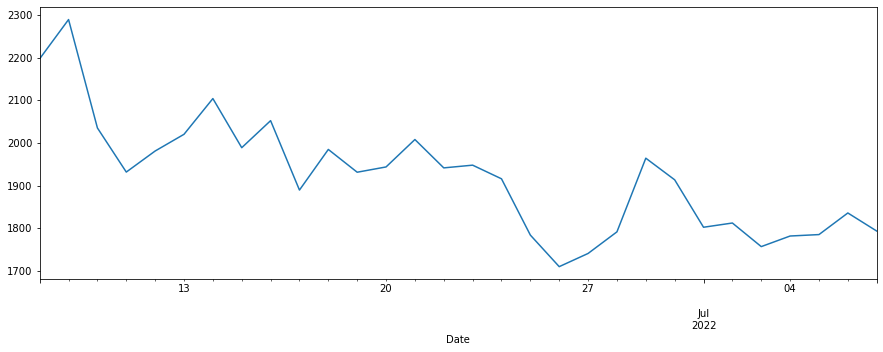

In [276]:
# predictions chart

predictions_df['Prediction'].plot(figsize=(15,5))

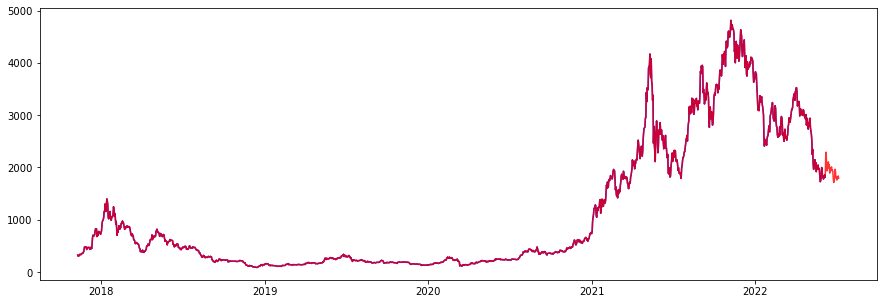

In [277]:
pred_real_df = pd.merge(left=df[['Close']],
            right=predictions_df,
            how='outer',
            left_index=True,
            right_index=True)

real_plus_pred = np.where(pred_real_df['Prediction'].isnull(), pred_real_df['Close'], pred_real_df['Prediction'])
pred_real_df['real+pred'] = real_plus_pred

pred_real_df


plt.figure(figsize=(15,5))
plt.plot(pred_real_df['Close'], color='blue')
plt.plot(pred_real_df['real+pred'],color='r', alpha=0.8, )
plt.show()


/Users/brunogama/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


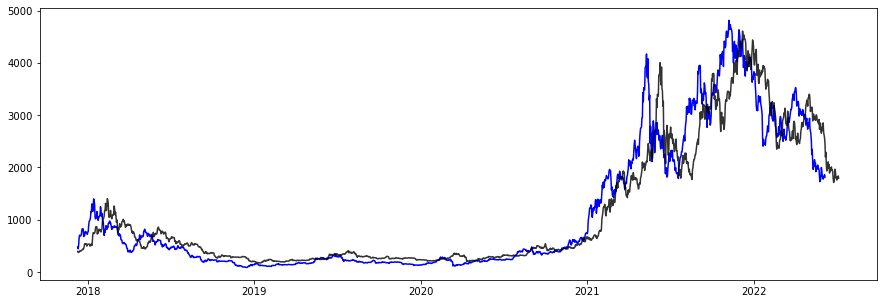

In [278]:

all_pred = linReg.predict(df[['Close']])

add_df = pd.DataFrame(all_pred, columns=['prediction_all'], index=new_index)

total = pd.merge(left=pred_real_df, right=add_df,
left_index=True,
right_index=True)


plt.figure(figsize=(15,5))
plt.plot(total['Close'], color='blue')
#plt.plot(total['real+pred'],color='r', alpha=0.8, )
plt.plot(total['prediction_all'],color='black', alpha=0.8, )

plt.show()

In [279]:
df

,Open,High,Low,Close,Adj Close,Volume,Prediction
Date,,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984,473.502014
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984,441.721008
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992,515.135986
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936,651.431030
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984,702.767029
...,...,...,...,...,...,...,...
2022-06-03,1834.135010,1840.058838,1746.509766,1775.078613,1775.078613,14878001811,NaN
2022-06-04,1775.220825,1810.299683,1751.533325,1801.609497,1801.609497,8677951273,NaN
2022-06-05,1801.818970,1825.859619,1777.133301,1805.204956,1805.204956,8850385937,NaN


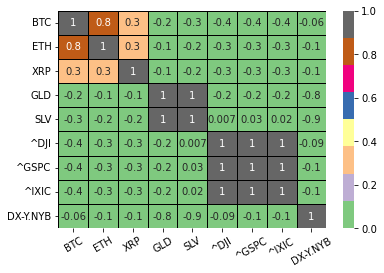

In [243]:
df = pd.read_excel('dataset.xlsx')
# Correlation matrix
corrmat = df.corr()
fig = plt.figure()
hmap = sns.heatmap(corrmat, vmax = 1, annot = True,vmin=0, cmap='Accent',fmt='.1g',linewidths=1, linecolor='black',xticklabels= True, yticklabels=True)
hmap.set_xticklabels(corrmat, rotation=30)
plt.show()


In [251]:
df


,Unnamed: 0,BTC,ETH,XRP,GLD,SLV,^DJI,^GSPC,^IXIC,DX-Y.NYB
0,BTC,1.00,0.54,0.26,0.02,0.01,0.06,0.06,0.06,-0.01
1,ETH,0.54,1.00,0.29,0.08,0.09,0.11,0.11,0.12,-0.01
2,XRP,0.26,0.29,1.00,0.05,0.05,0.08,0.08,0.09,-0.04
3,GLD,0.02,0.08,0.05,1.00,0.80,0.03,0.04,0.03,-0.41
4,SLV,0.01,0.09,0.05,0.80,1.00,0.19,0.21,0.20,-0.42
5,^DJI,0.06,0.11,0.08,0.03,0.19,1.00,0.97,0.78,0.01
6,^GSPC,0.06,0.11,0.08,0.04,0.21,0.97,1.00,0.85,-0.02
7,^IXIC,0.06,0.12,0.09,0.03,0.20,0.78,0.85,1.00,0.00
8,DX-Y.NYB,-0.01,-0.01,-0.04,-0.41,-0.42,0.01,-0.02,0.00,1.00
